In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Create dataframe from scratch using a dictionary
temp_dict = {"Fruit":["Apple","Banana"],
            "Drinks":["Fanta","Coke"]}
print (temp_dict)
pd.DataFrame(temp_dict)

{'Fruit': ['Apple', 'Banana'], 'Drinks': ['Fanta', 'Coke']}


,Fruit,Drinks
0,Apple,Fanta
1,Banana,Coke


In [7]:
# Create a df using list
a = [1,2,3,4,5]
b = ['a','e','i']
pd.DataFrame([a,b])
temp = pd.DataFrame([a,b]).T
temp.columns =["first",'second']
temp

,first,second
0,1,a
1,2,e
2,3,i
3,4.0,NaN
4,5.0,NaN


In [8]:
#Import Titanic file (csv) as Pandas Dataframe
df =  pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
#Let's check data types and see if this makes sense. If not, we will convert it to their proper type.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df['PassengerId'] = df['PassengerId'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df.dtypes

PassengerId    category
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [12]:
## Let us check if there are any empty values (nulls)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Age has 177 nulls! Out of how many? 
# What to do with this? Delete? Or fill the gap with some statistics? Let's fill null with average age!
avg_age = int(df.Age.mean())
print (avg_age)

29


In [14]:
# Ok, lets create a new column and fill with avg
df['age_av'] = df['Age']
df['age_av'] = df['age_av'].fillna(avg_age)
df['age_av'].isnull().sum()

0

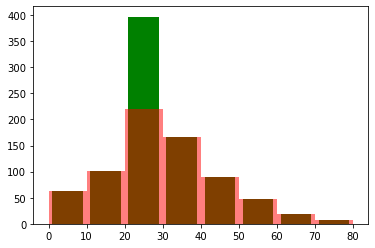

In [15]:
bins = range(0,90,10)
plt.hist(df['age_av'], bins= bins, color = 'g', rwidth = 0.8)
plt.hist(df['Age'], bins = bins, color = 'red', alpha = 0.5)
plt.show()

In [16]:
# Next thing, we can forward fill. I.e forward last good value to nulls
df['age_fill'] = df['Age']
df['age_fill'] = df['age_fill'].fillna(method ='ffill')

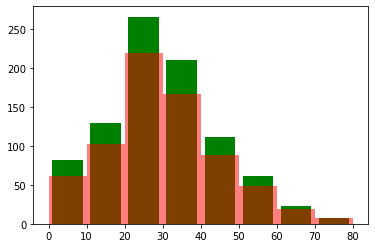

In [17]:
plt.hist(df['age_fill'], bins= bins, color = 'g', rwidth = 0.8)
plt.hist(df['Age'], bins = bins, color = 'red', alpha = 0.5)
plt.show()

In [18]:
# Next thing, we can interpolate
df['age_lin'] = df['Age']
df['age_lin'] = df['age_lin'].interpolate(method ='linear')

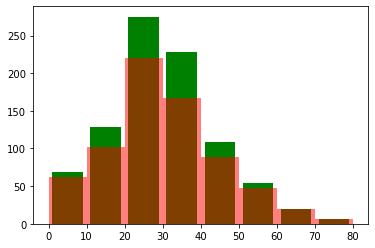

In [19]:
plt.hist(df['age_lin'], bins= bins, color = 'g', rwidth = 0.8)
plt.hist(df['Age'], bins = bins, color = 'red', alpha = 0.5)
plt.show()

In [20]:
df.loc[df.Age.isnull()][['Age',"age_lin","age_av","age_fill"]]

,Age,age_lin,age_av,age_fill
5,NaN,44.5,29.0,35.0
17,NaN,16.5,29.0,2.0
19,NaN,33.0,29.0,31.0
26,NaN,28.5,29.0,38.0
28,NaN,26.0,29.0,19.0
...,...,...,...,...
859,NaN,32.5,29.0,24.0
863,NaN,36.0,29.0,48.0
868,NaN,17.5,29.0,31.0
878,NaN,37.5,29.0,19.0


In [21]:
df[['Age',"age_lin","age_av","age_fill"]].head(10)

,Age,age_lin,age_av,age_fill
0,22.0,22.0,22.0,22.0
1,38.0,38.0,38.0,38.0
2,26.0,26.0,26.0,26.0
3,35.0,35.0,35.0,35.0
4,35.0,35.0,35.0,35.0
5,NaN,44.5,29.0,35.0
6,54.0,54.0,54.0,54.0
7,2.0,2.0,2.0,2.0
8,27.0,27.0,27.0,27.0
9,14.0,14.0,14.0,14.0


In [22]:
df.describe()

,Age,SibSp,Parch,Fare,age_av,age_fill,age_lin
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,29.560236,29.58156,29.726061
std,14.526497,1.102743,0.806057,49.693429,13.005010,14.55459,13.902353
min,0.420000,0.000000,0.000000,0.000000,0.420000,0.42000,0.420000
25%,20.125000,0.000000,0.000000,7.910400,22.000000,20.00000,21.000000
50%,28.000000,0.000000,0.000000,14.454200,29.000000,28.00000,28.500000
75%,38.000000,1.000000,0.000000,31.000000,35.000000,38.00000,38.000000
max,80.000000,8.000000,6.000000,512.329200,80.000000,80.00000,80.000000


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_av,age_fill,age_lin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


In [24]:
df.corr()

,Age,SibSp,Parch,Fare,age_av,age_fill,age_lin
Age,1.000000,-0.308247,-0.189119,0.096067,1.000000,1.000000,1.000000
SibSp,-0.308247,1.000000,0.414838,0.159651,-0.232978,-0.206104,-0.213410
Parch,-0.189119,0.414838,1.000000,0.216225,-0.176486,-0.165191,-0.170013
Fare,0.096067,0.159651,0.216225,1.000000,0.093706,0.083417,0.087119
age_av,1.000000,-0.232978,-0.176486,0.093706,1.000000,0.893470,0.934939
age_fill,1.000000,-0.206104,-0.165191,0.083417,0.893470,1.000000,0.950992
age_lin,1.000000,-0.213410,-0.170013,0.087119,0.934939,0.950992,1.000000


<AxesSubplot:>

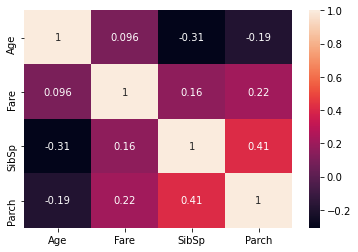

In [25]:
import seaborn as sns
sns.heatmap(df[['Age',"Fare","SibSp","Parch"]].corr(), annot = True)

In [26]:
# Groupby
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
#How many males survived?
df.loc[df.Sex == 'male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [28]:
df.groupby(['Sex','Survived'])['Survived'].count() # sum(), mean()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [29]:
#HW1:
# How many different Pclasses are there?
# Of those different Pclasses, do male occupy more or female?
# Is there any relationship between Pclass and whether they survived?
# Is there any relationship between Age and whether they survived?
# Who paid more in average? Male or female?
# 'Cabin' has too many null values. Remove that column from dataframe. 

# Handling DateTime Using Pandas

In [30]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [31]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [32]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [33]:
# Set datetime as index
data = data.set_index('Date')
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [34]:
# Look at freq. Currently it is set to None.
#What this means is that it is not known if data is collected by the hour,
#by day, my minute, etc.
# Now let's set the frequency to Daily.
data_freq = data.asfreq('D')
data_freq

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [35]:
data_freq.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

In [36]:
## If there were missing dates, the above code inserts nan. 
## So, let us do some imputation. 
data.shape, data_freq.shape

((4383, 4), (4383, 4))

In [37]:
data_freq.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [38]:
data_freq = data.asfreq('D', method = 'ffill')
data_freq.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [39]:
## Resample Weekly
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [40]:
# Rolling average ( Doing 7 day-rolling aveerage)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


In [41]:
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

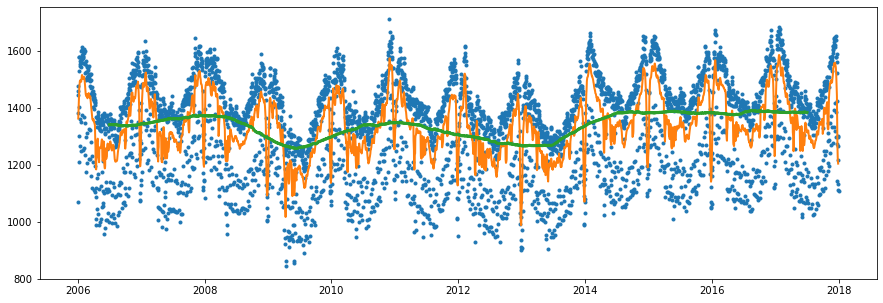

In [42]:
plt.figure(figsize=[15,5])
plt.plot(data['Consumption'], marker='.', linestyle="None")
plt.plot(data_7d_rol['Consumption'], linewidth=2)
plt.plot(data_365d_rol['Consumption'],linewidth=3)
plt.show()

In [43]:
## Splitting date
import datetime
data['Year'] = data.index.year
data['Month'] = data.index.month

In [44]:
data.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1
